# ROC 曲线
ROC = Receiver Operation Characteristic Curve
描述TPR和FPR之间的关系<br>
TPR（true positive rate） = Recall = TP / (TP + FN)<br>
FPR (false positive rate) = FP / (TN + FP)<br>
![g1](img/g1.png)
![g2](img/g2.png)

In [1]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy() # 不修改原有数据
y[digits.target==9]=1
y[digits.target!=9]=0
# 10个类别的分类问题 转换为了二分类问题 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [2]:
decision_scores=log_reg.decision_function(X_test)

In [3]:
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

In [4]:
from playML.metrics import FPR, TPR

In [5]:
fprs = []
tprs = []
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype="int")
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

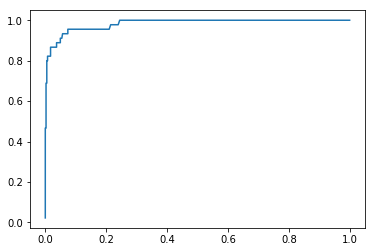

In [6]:
import matplotlib.pyplot as plt
plt.plot(fprs, tprs)

# sklearn中的ROC

In [7]:
from sklearn.metrics import roc_curve

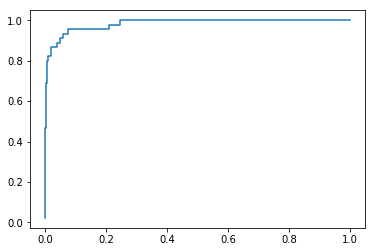

In [8]:
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)
plt.plot(fprs, tprs)

In [9]:
# 当FPR较小时, 如果我们能得到很好的TPR值 -》对应着面积越大

In [10]:
# cal area
# auc = area under curve
from sklearn.metrics import roc_auc_score

In [11]:
roc_auc_score(y_test, decision_scores)

0.9830452674897119

In [12]:
# roc_auc_score可以用来评估某个分类算法的指标
# 该值对有偏数据不敏感
# 多用来比较两个模型孰优孰劣

# 多分类问题中的混淆矩阵

In [13]:
X = digits.data
y = digits.target

In [14]:
y.shape

(1797,)

In [15]:
X.shape

(1797, 64)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.8)

In [17]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.93115438108484

In [18]:
from sklearn.metrics import precision_score
# 多类别时无法使用精准率
# comment me
#　precision_score(y_test, y_predict)
y_predict = log_reg.predict(X_test)
precision_score(y_test,y_predict, average="micro")

0.93115438108484

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test, y_predict)

array([[147,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 123,   1,   2,   0,   0,   0,   3,   4,  10],
       [  0,   0, 134,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 138,   0,   5,   0,   1,   5,   0],
       [  2,   5,   0,   0, 139,   0,   0,   3,   0,   1],
       [  1,   3,   1,   0,   0, 146,   0,   0,   1,   0],
       [  0,   2,   0,   0,   0,   1, 131,   0,   2,   0],
       [  0,   0,   0,   1,   0,   0,   0, 132,   1,   2],
       [  1,   9,   2,   3,   2,   4,   0,   0, 115,   4],
       [  0,   1,   0,   5,   0,   3,   0,   2,   2, 134]], dtype=int64)

# 绘制混淆矩阵

In [21]:
cfm = confusion_matrix(y_test, y_predict)

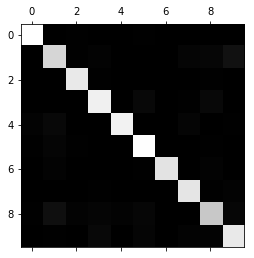

In [22]:
plt.matshow(cfm, cmap=plt.cm.gray)

In [23]:
row_sums = np.sum(cfm, axis=1) #每一行的和
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0) # 设置对角线为0
err_matrix

array([[0.        , 0.        , 0.00735294, 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00735294, 0.01342282, 0.        ,
        0.        , 0.        , 0.02205882, 0.02857143, 0.06802721],
       [0.        , 0.        , 0.        , 0.00671141, 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03289474, 0.        , 0.00735294, 0.03571429, 0.        ],
       [0.01342282, 0.03496503, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02205882, 0.        , 0.00680272],
       [0.00671141, 0.02097902, 0.00735294, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.01398601, 0.        , 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.01428571, 0.        ],
       [0.        , 0.        , 0.       

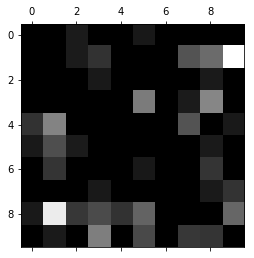

In [24]:
plt.matshow(err_matrix, cmap=plt.cm.gray)

In [26]:
# 从途中可以看到 真值为1的很多被预测为9了
# 还有真值为8的也预测为1了
# 我们甚至可以微调对应的thresholds